# Minimize receptor model pade



Optimal q0: 1.0
Optimal q1: 8.472107311260585
Optimal q2: 7.019013299733513
Optimal q3: 8.372832561443431
Optimal q4: 5.977659300681898
Optimal q5: 10.034379294360798


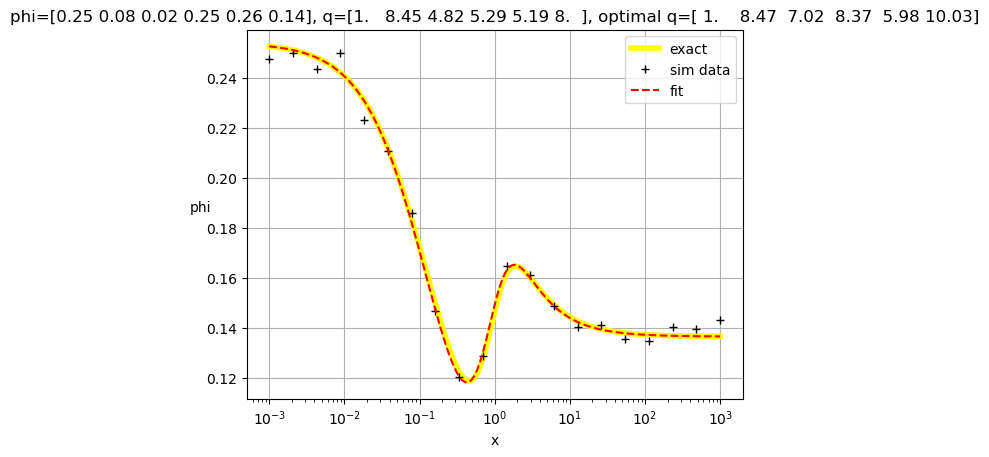

In [1]:
import numpy as np
from scipy.optimize import minimize

import random
from matplotlib import pyplot as plt
np.set_printoptions(precision=2)

# construct target rational function
n=5 # order
xlogmin=-3
xlogmax=3
phi = np.random.uniform(low=0,high=1,size=n+1)
sum_phi = sum(phi); phi = np.array([float(p)/sum_phi for p in phi])
q = np.random.uniform(low=0,high=10,size=n+1); q[0]=1

# q_list is length n+1 (same as phi_list)
def pade(phi_list,q_list,x_list):
    num = np.zeros(x_list.size)
    den = np.zeros(x_list.size)
    for i, (phi, q) in enumerate(zip(phi_list,q_list)):
        num = np.add(num,[phi*q*x**i for x in x_list])
        den = np.add(den,[q*x**i for x in x_list])
    return np.divide(num,den)

x = np.logspace(xlogmin,xlogmax,20)
y = pade(phi,q,x) + np.random.normal(size=x.size, scale=0.005) # w/ noise

x0 = np.logspace(xlogmin,xlogmax,1000)
y0 = pade(phi,q,x0)

# Define the objective function
def objective_function(params):
    q = params
    q_with_one = np.append(1, q)
    #print(type(y))
    residuals = y - pade(phi,q_with_one,x)
    return np.sum(residuals ** 2)

# Initial guess for parameters
initial_guess = np.ones(n) # n is order, which is the number of q's

# q's must be positive
# this loop makes bnds = ((0, None), (0, None), ... ) n times
bnds = ((0, None),)
for _ in range(n-1):
    bnds += ((0, None),)

# Perform optimization
result = minimize(objective_function, initial_guess, bounds=bnds)

# Extract and print optimized q's
optimal_q = np.append(1, result.x)
for i, qq in enumerate(optimal_q):
    print(f'Optimal q{i}: {qq}')

# Evaluate result 
y0_result = pade(phi,optimal_q,x0)

plt.semilogx(x0,y0,linewidth=4,color='yellow',label='exact')
plt.semilogx(x,y,'+',color='black',label='sim data')
plt.semilogx(x0,y0_result,color='red',linestyle='dashed',label='fit')
plt.title(f'phi={phi}, q={q}, optimal q={optimal_q}')
plt.xlabel('x')
plt.ylabel('phi',rotation = 0)
plt.legend()
plt.grid()
plt.show()
